## Import Modules

In [1]:
import os, re, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, ensemble, svm
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from collections import defaultdict
from tqdm.notebook import tqdm

## Explicit Test and Train

In [2]:
RANDOM_SEED=42

# load training dataset
prefix = "TSOA_PYR"
training_data=f"{prefix}_train_trimmed_desc.csv"
train_set=pd.read_csv(training_data)
Descs=train_set.columns[1:-1]

# load test dataset
test_data=f"{prefix}_test_trimmed_desc.csv"
test_set=pd.read_csv(test_data)
train_set_decs=train_set[Descs]
test_set_decs=test_set[Descs]

# Apply X and y and scale
y_train = train_set['Ea']
y_test = test_set['Ea']
#place descriptors in X
X_train = train_set[Descs]
X_test = test_set[Descs]
#scale data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Models

In [3]:
rf_obj = ensemble.RandomForestRegressor(n_estimators=928, max_depth=34, random_state=RANDOM_SEED, n_jobs=8).fit(X_train, y_train)
et_obj = ensemble.ExtraTreesRegressor(n_estimators=297, max_depth=37, random_state=RANDOM_SEED, n_jobs=8).fit(X_train, y_train)

## Scoring

  0%|          | 0/2 [00:00<?, ?it/s]

RandomForestRegressor(max_depth=34, n_estimators=928, n_jobs=8, random_state=42)
Accuracy on test data: 0.68
Elapsed time to compute the importances: 144.822 seconds
Using the r2 metric
HOMO_Energy: 0.655 +/- 0.036
Orbital_Charge_Cu_d: 0.274 +/- 0.027
Orbital_Charge_Cu_s: 0.128 +/- 0.012
Orbital_Charge_L1_px: 0.082 +/- 0.010
LUMO_Energy: 0.070 +/- 0.016
Orbital_Charge_L2_px: 0.063 +/- 0.007
Atomic_Population_L2: 0.045 +/- 0.005
D_Bite_Angle: 0.044 +/- 0.005
Lowdin_Charge_Cu: 0.030 +/- 0.004
Orbital_Charge_Cu_p: 0.028 +/- 0.004
Lowdin_Charge_C: 0.026 +/- 0.004
Orbital_Charge_L1_d: 0.023 +/- 0.004
Bond_Order_Cu_L2: 0.023 +/- 0.004
Orbital_Charge_L1_pz: 0.014 +/- 0.002
Orbital_Charge_C_pz: 0.011 +/- 0.005
Bite_Angle: 0.011 +/- 0.003
Atomic_Population_C: 0.010 +/- 0.002
Bonded_Valence_I: 0.009 +/- 0.002
Orbital_Charge_I_d: 0.009 +/- 0.003
Bonded_Valence_L1: 0.007 +/- 0.002
Orbital_Charge_L1_py: 0.007 +/- 0.001


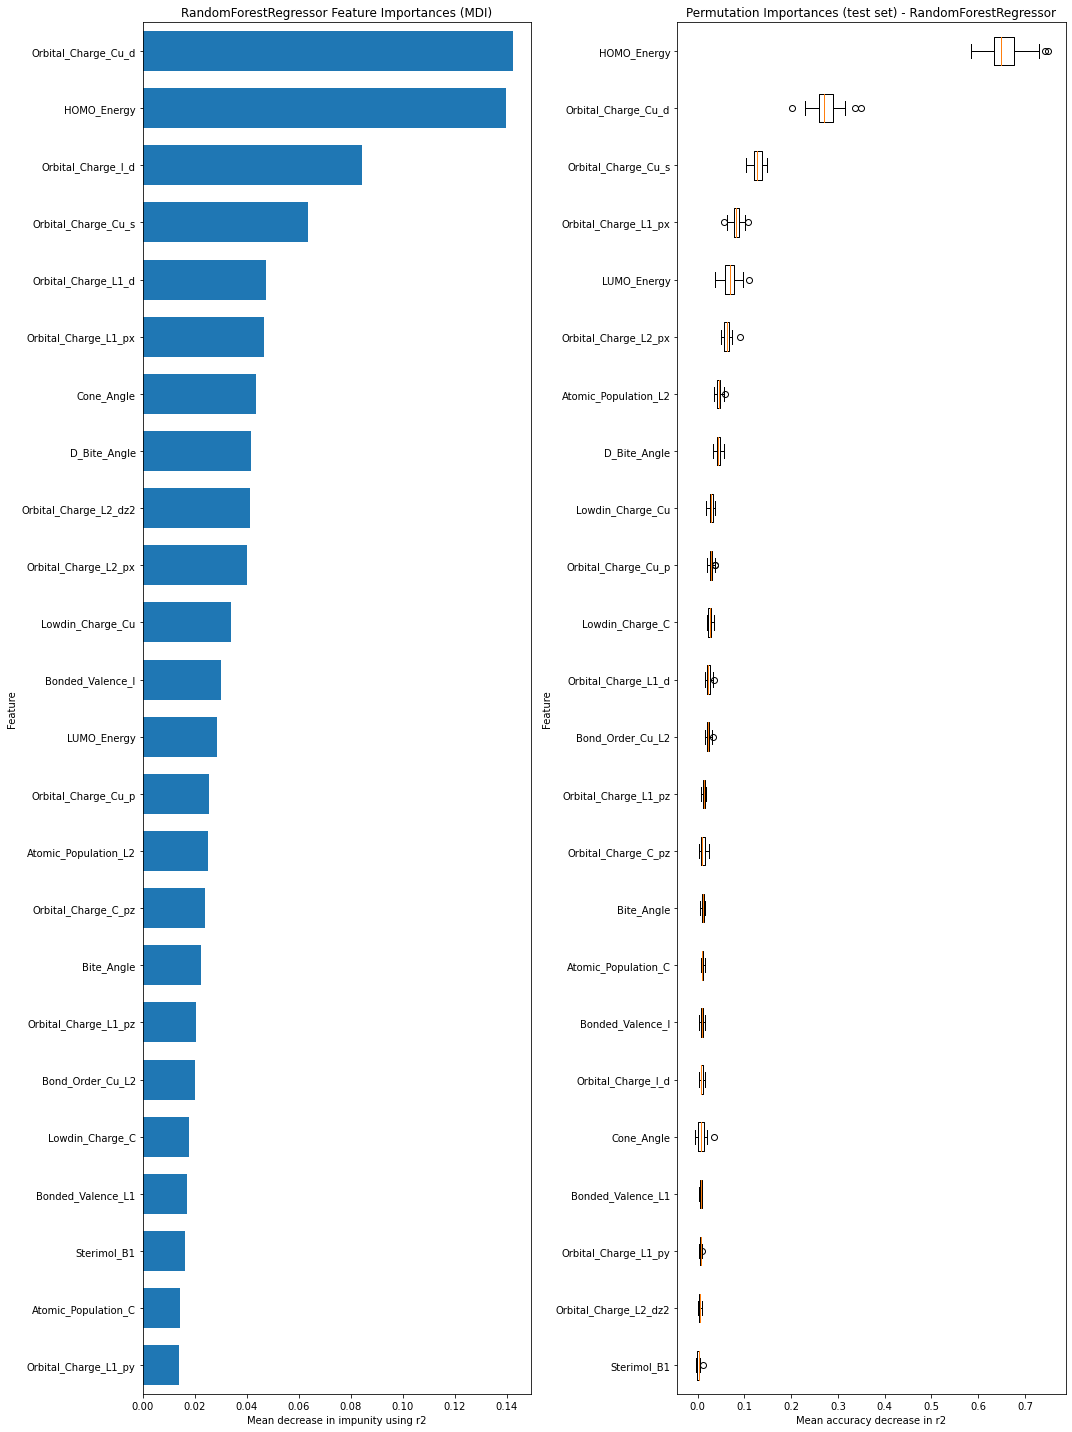

Using the neg_mean_absolute_percentage_error metric


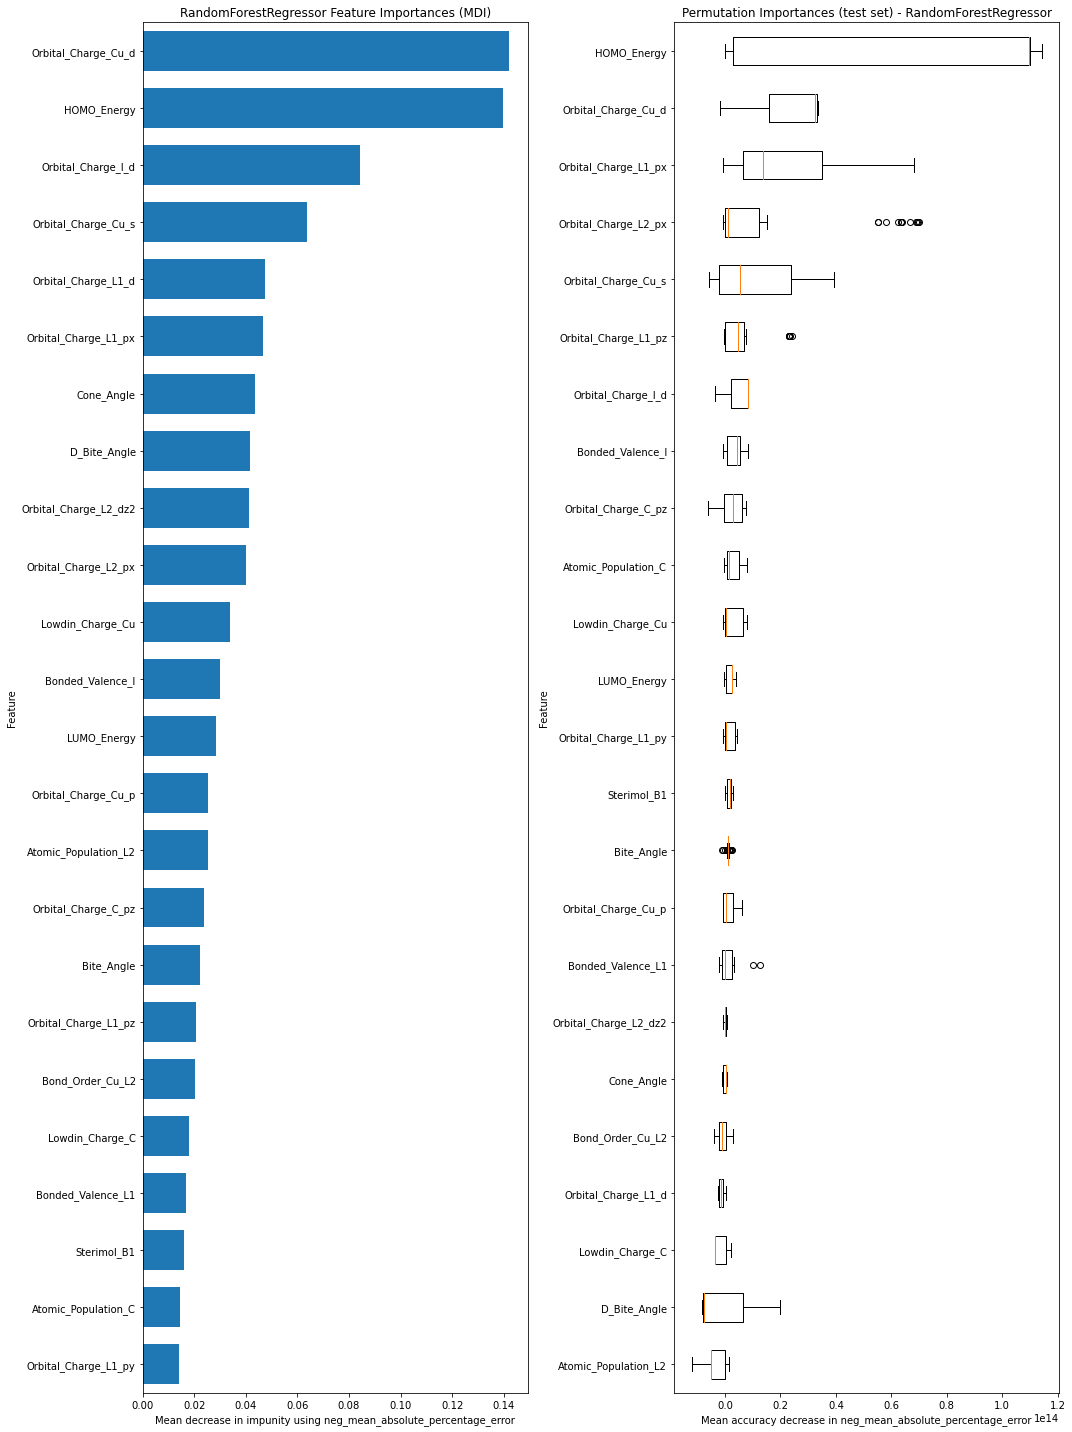

Using the neg_mean_squared_error metric
HOMO_Energy: 53.325 +/- 2.970
Orbital_Charge_Cu_d: 22.293 +/- 2.213
Orbital_Charge_Cu_s: 10.408 +/- 0.939
Orbital_Charge_L1_px: 6.657 +/- 0.814
LUMO_Energy: 5.702 +/- 1.268
Orbital_Charge_L2_px: 5.116 +/- 0.605
Atomic_Population_L2: 3.652 +/- 0.408
D_Bite_Angle: 3.603 +/- 0.398
Lowdin_Charge_Cu: 2.401 +/- 0.357
Orbital_Charge_Cu_p: 2.302 +/- 0.342
Lowdin_Charge_C: 2.123 +/- 0.318
Orbital_Charge_L1_d: 1.898 +/- 0.324
Bond_Order_Cu_L2: 1.838 +/- 0.297
Orbital_Charge_L1_pz: 1.124 +/- 0.180
Orbital_Charge_C_pz: 0.934 +/- 0.411
Bite_Angle: 0.910 +/- 0.239
Atomic_Population_C: 0.840 +/- 0.159
Bonded_Valence_I: 0.746 +/- 0.201
Orbital_Charge_I_d: 0.703 +/- 0.236
Bonded_Valence_L1: 0.595 +/- 0.125
Orbital_Charge_L1_py: 0.534 +/- 0.102


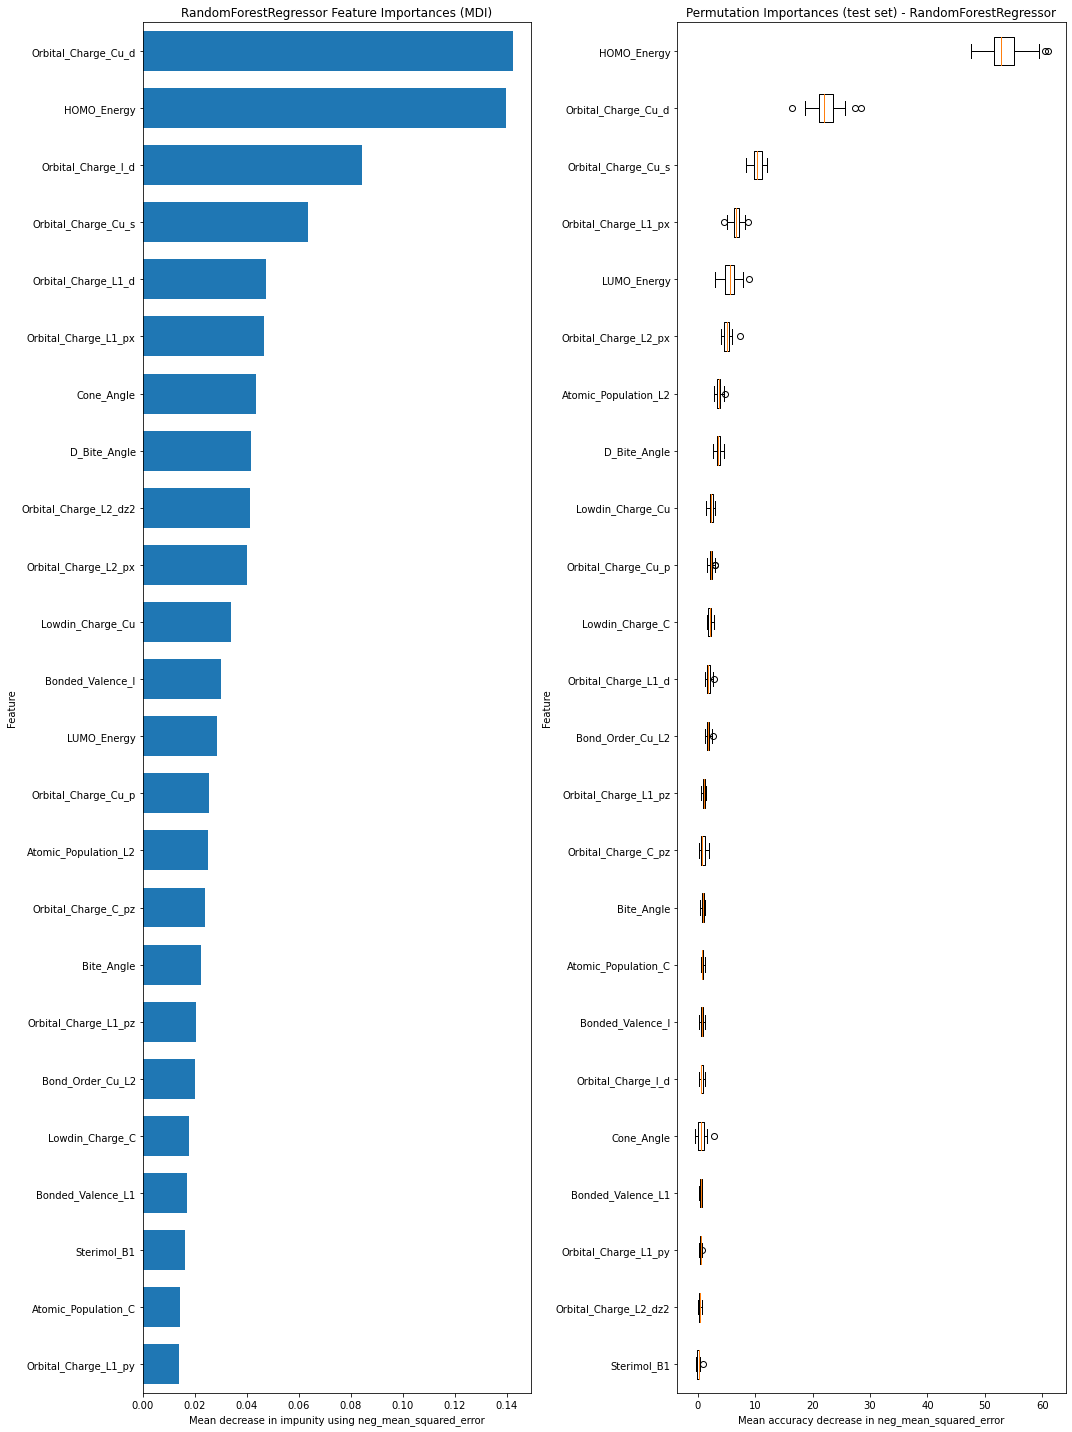

ExtraTreesRegressor(max_depth=37, n_estimators=297, n_jobs=8, random_state=42)
Accuracy on test data: 0.71
Elapsed time to compute the importances: 50.667 seconds
Using the r2 metric
HOMO_Energy: 1.032 +/- 0.068
Orbital_Charge_I_d: 0.232 +/- 0.025
Orbital_Charge_Cu_s: 0.137 +/- 0.010
Atomic_Population_L2: 0.123 +/- 0.011
Orbital_Charge_Cu_d: 0.098 +/- 0.012
Lowdin_Charge_C: 0.062 +/- 0.007
Bonded_Valence_L1: 0.053 +/- 0.007
Orbital_Charge_L1_d: 0.052 +/- 0.007
LUMO_Energy: 0.039 +/- 0.006
Lowdin_Charge_Cu: 0.028 +/- 0.003
D_Bite_Angle: 0.027 +/- 0.004
Orbital_Charge_L2_dz2: 0.025 +/- 0.006
Orbital_Charge_Cu_p: 0.025 +/- 0.003
Bond_Order_Cu_L2: 0.023 +/- 0.004
Bite_Angle: 0.014 +/- 0.003
Orbital_Charge_L2_px: 0.013 +/- 0.004
Orbital_Charge_L1_px: 0.013 +/- 0.003
Cone_Angle: 0.013 +/- 0.003
Orbital_Charge_L1_py: 0.012 +/- 0.003
Orbital_Charge_L1_pz: 0.011 +/- 0.002
Atomic_Population_C: 0.008 +/- 0.002
Bonded_Valence_I: 0.007 +/- 0.002
Sterimol_B1: 0.005 +/- 0.001


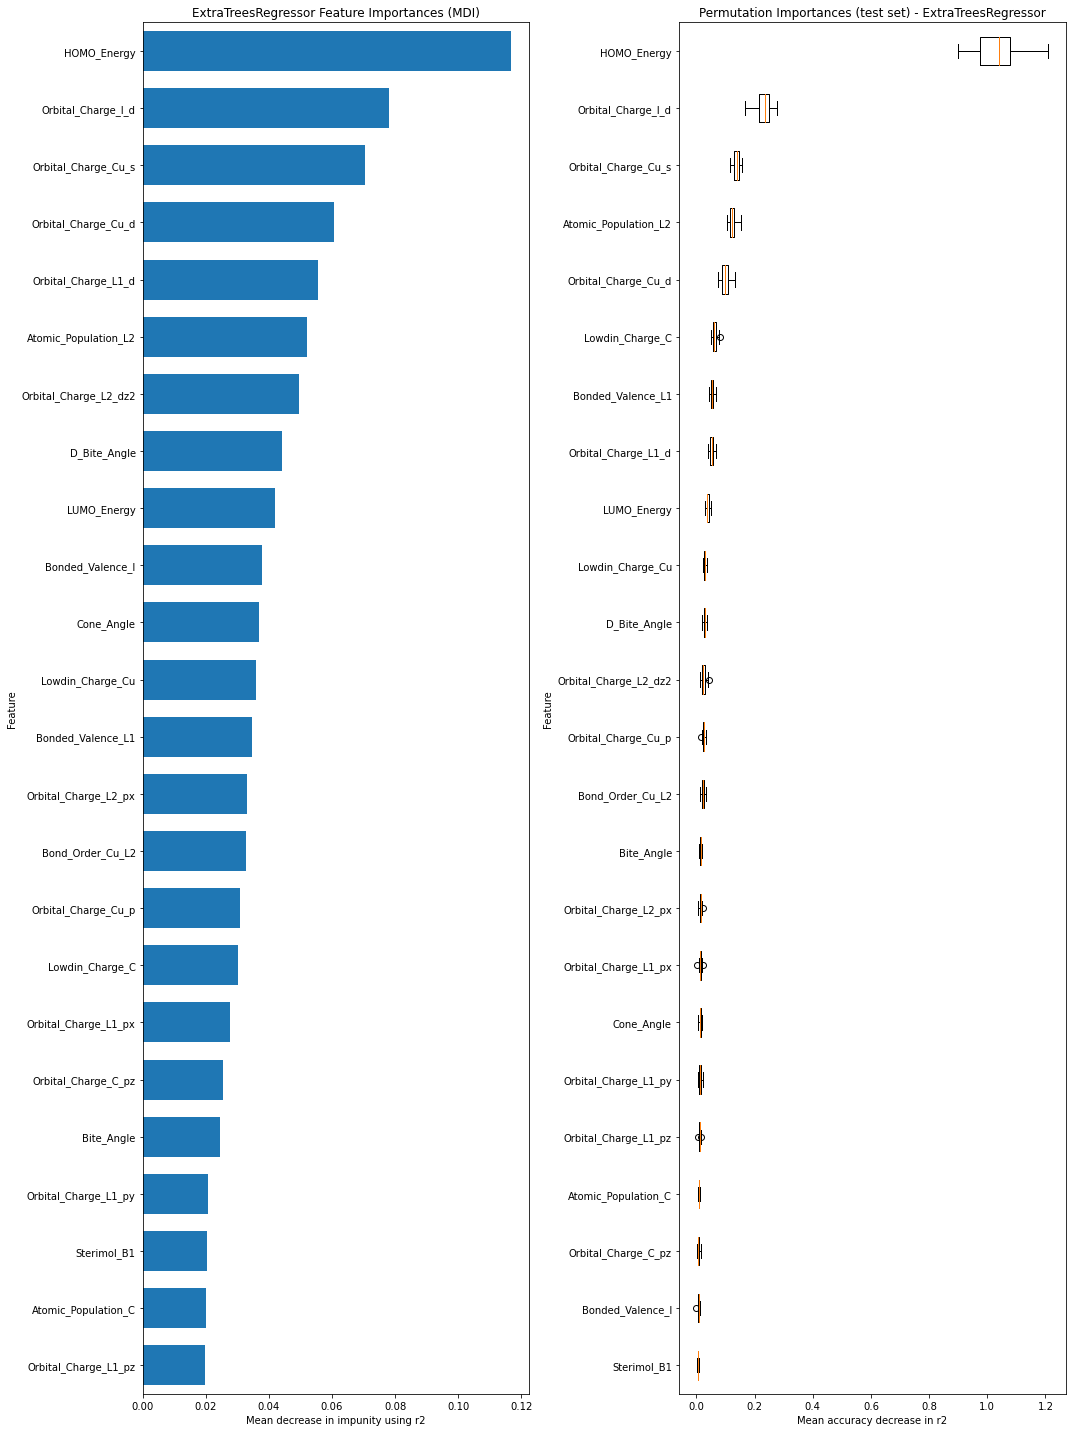

Using the neg_mean_absolute_percentage_error metric
Sterimol_B1: 7815176679019.126 +/- 3409431150943.407
Bite_Angle: 3980483641016.740 +/- 1721152229961.461
Orbital_Charge_L2_dz2: 2094386372634.719 +/- 717477413930.140


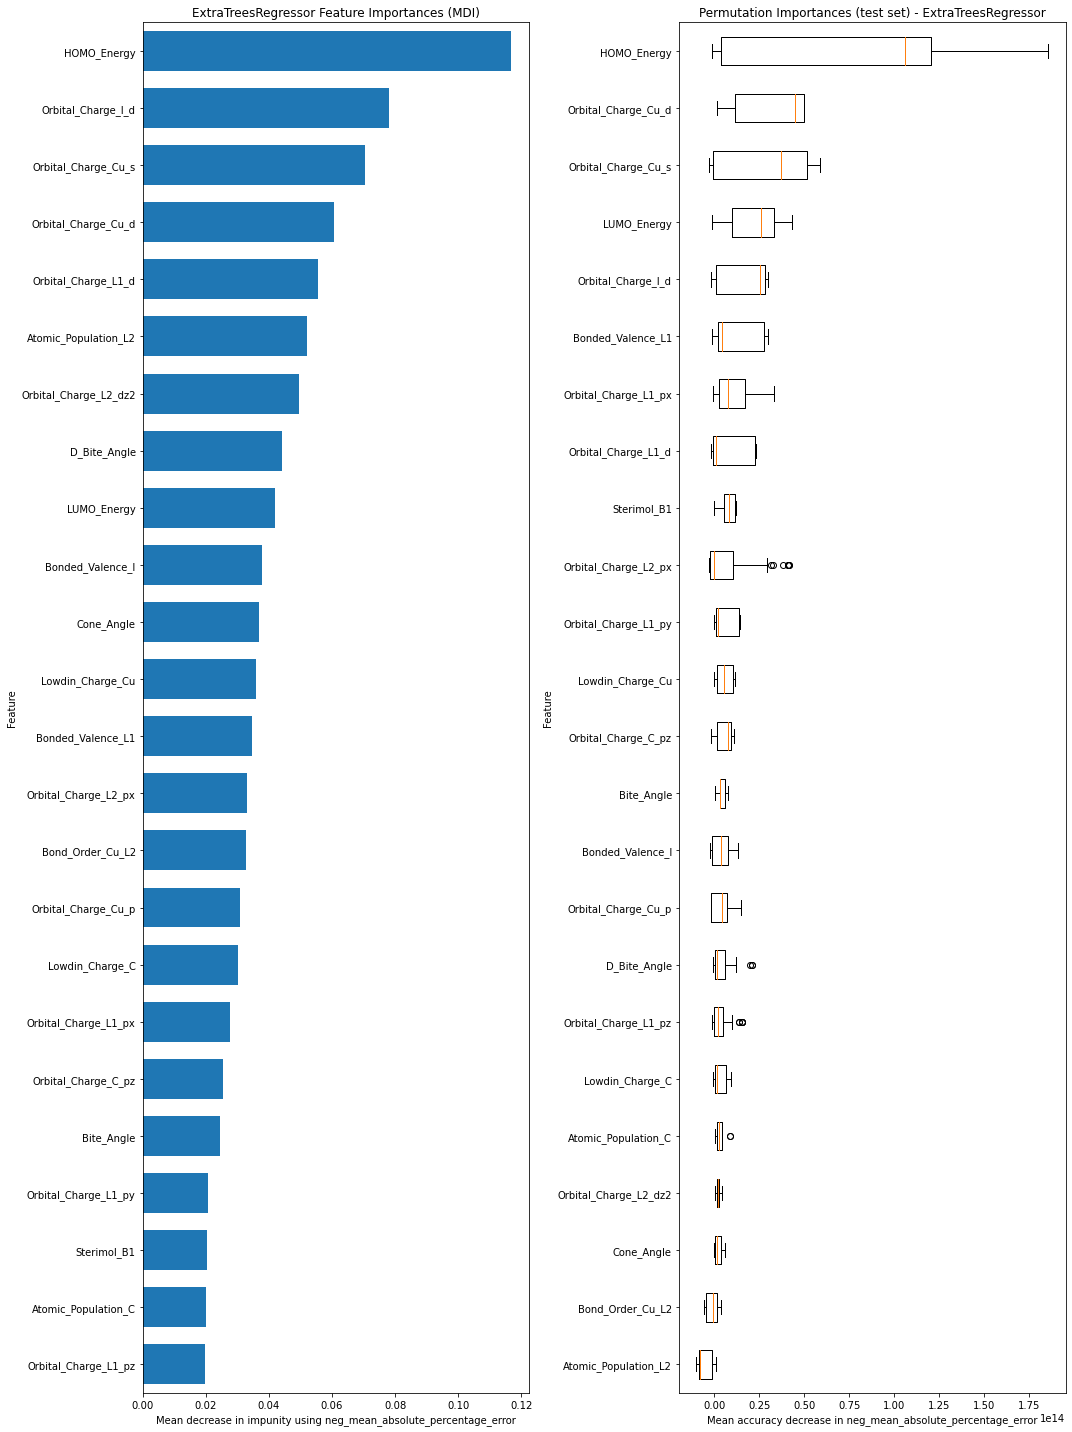

Using the neg_mean_squared_error metric
HOMO_Energy: 83.982 +/- 5.551
Orbital_Charge_I_d: 18.846 +/- 2.028
Orbital_Charge_Cu_s: 11.163 +/- 0.811
Atomic_Population_L2: 10.032 +/- 0.882
Orbital_Charge_Cu_d: 7.984 +/- 0.994
Lowdin_Charge_C: 5.047 +/- 0.566
Bonded_Valence_L1: 4.348 +/- 0.534
Orbital_Charge_L1_d: 4.250 +/- 0.543
LUMO_Energy: 3.138 +/- 0.451
Lowdin_Charge_Cu: 2.252 +/- 0.281
D_Bite_Angle: 2.211 +/- 0.335
Orbital_Charge_L2_dz2: 2.056 +/- 0.516
Orbital_Charge_Cu_p: 2.005 +/- 0.276
Bond_Order_Cu_L2: 1.860 +/- 0.358
Bite_Angle: 1.170 +/- 0.215
Orbital_Charge_L2_px: 1.092 +/- 0.291
Orbital_Charge_L1_px: 1.043 +/- 0.248
Cone_Angle: 1.020 +/- 0.243
Orbital_Charge_L1_py: 1.000 +/- 0.284
Orbital_Charge_L1_pz: 0.870 +/- 0.171
Atomic_Population_C: 0.689 +/- 0.166
Bonded_Valence_I: 0.560 +/- 0.184
Sterimol_B1: 0.395 +/- 0.122


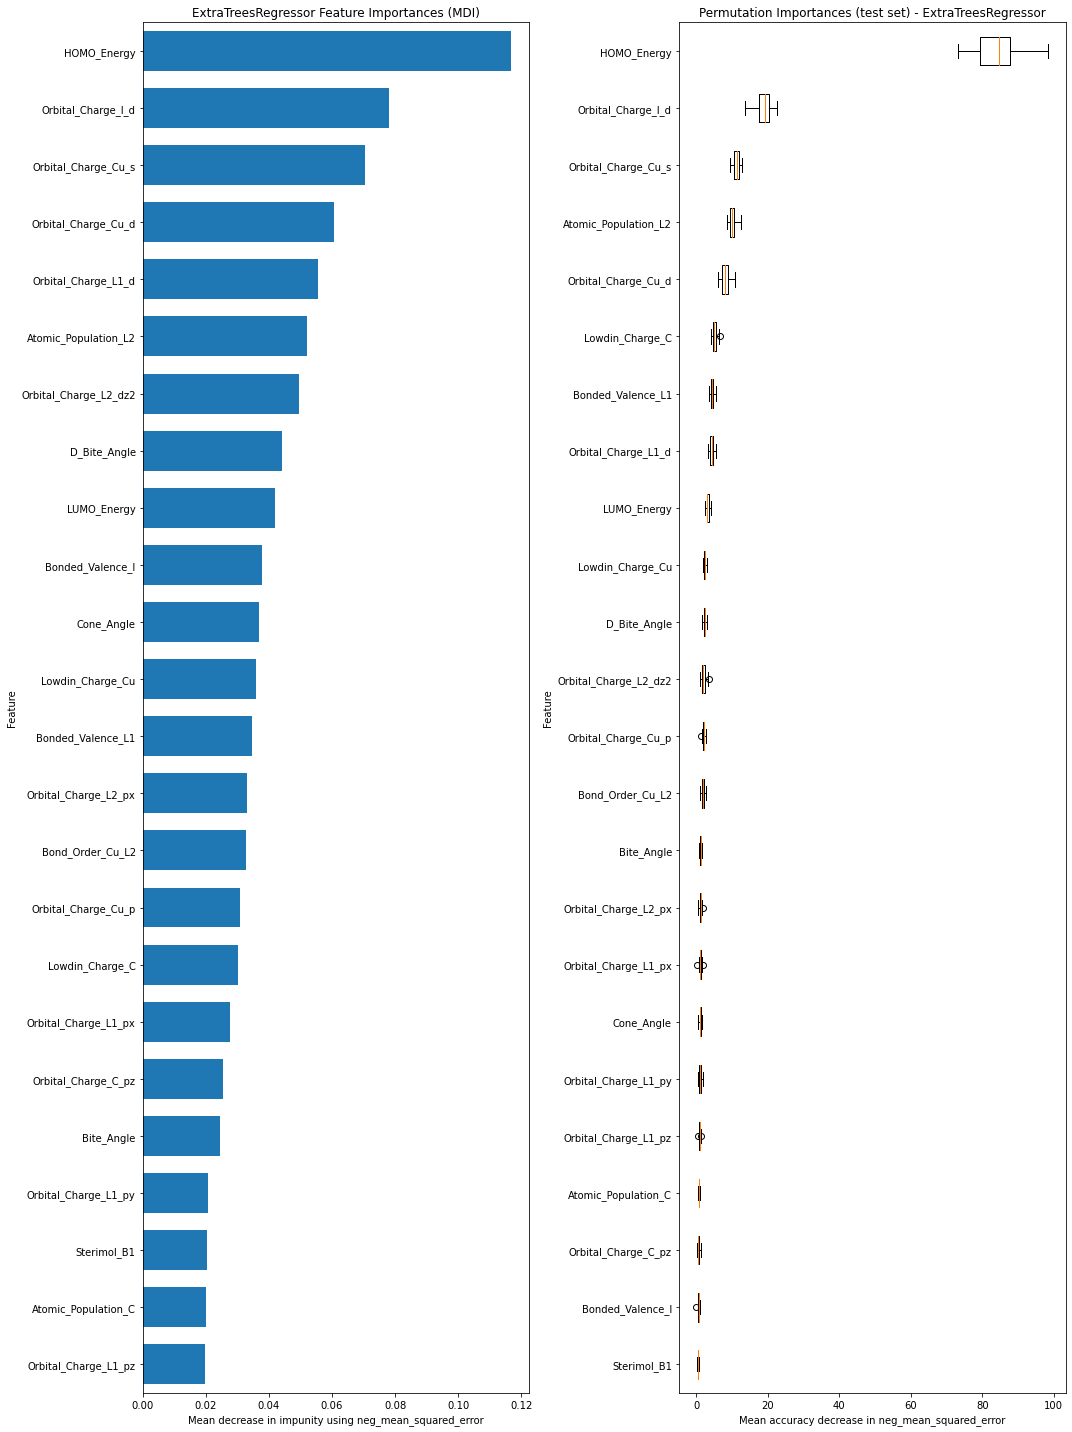

In [4]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
models = [rf_obj, et_obj]
for model in tqdm(models):
    start_time = time.time()
    print(str(model))
    model_name = type(model).__name__
    print(f"Accuracy on test data: {model.score(X_test, y_test):.2f}")
    r_multi = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=RANDOM_SEED, scoring=scoring)
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    for metric in r_multi:
        print(f"Using the {metric} metric")
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
               print(f"{Descs[i]}: "
                     f"{r.importances_mean[i]:.3f}"
                     f" +/- {r.importances_std[i]:.3f}")
        
        perm_sorted_idx = r.importances_mean.argsort()
        importance_sorted_idx = np.argsort(model.feature_importances_)
        indices = np.arange(0, len(model.feature_importances_)) + 0.5
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
        ax1.barh(indices, model.feature_importances_[importance_sorted_idx], height=0.7)
        ax1.set_yticks(indices)
        ax1.set_yticklabels(Descs[importance_sorted_idx])
        ax1.set_ylim((0, len(model.feature_importances_)))
        ax1.set_title(f"{model_name} Feature Importances (MDI)")
        ax1.set_ylabel("Feature")
        ax1.set_xlabel(f"Mean decrease in impunity using {metric}")
        ax2.boxplot(
            r.importances[perm_sorted_idx].T,
            vert=False,
            labels=Descs[perm_sorted_idx],
            
        )
        ax2.set_title(f"Permutation Importances (test set) - {model_name}")
        ax2.set_ylabel("Feature")
        ax2.set_xlabel(f"Mean accuracy decrease in {metric}")
        fig.tight_layout()
        plt.show()

## Scoring Training

  0%|          | 0/2 [00:00<?, ?it/s]

RandomForestRegressor(max_depth=34, n_estimators=928, n_jobs=8, random_state=42)
Elapsed time to compute the importances: 171.175 seconds
Using the r2 metric
HOMO_Energy: 0.520 +/- 0.019
Orbital_Charge_Cu_d: 0.277 +/- 0.017
Orbital_Charge_Cu_s: 0.134 +/- 0.004
Orbital_Charge_L2_px: 0.105 +/- 0.005
Orbital_Charge_L1_px: 0.105 +/- 0.004
Orbital_Charge_I_d: 0.070 +/- 0.003
LUMO_Energy: 0.064 +/- 0.004
D_Bite_Angle: 0.059 +/- 0.002
Orbital_Charge_L1_d: 0.055 +/- 0.002
Cone_Angle: 0.049 +/- 0.003
Atomic_Population_L2: 0.048 +/- 0.002
Orbital_Charge_L2_dz2: 0.044 +/- 0.002
Lowdin_Charge_Cu: 0.038 +/- 0.001
Orbital_Charge_Cu_p: 0.032 +/- 0.001
Lowdin_Charge_C: 0.032 +/- 0.001
Bite_Angle: 0.027 +/- 0.001
Bond_Order_Cu_L2: 0.026 +/- 0.001
Orbital_Charge_C_pz: 0.022 +/- 0.001
Bonded_Valence_I: 0.022 +/- 0.001
Orbital_Charge_L1_pz: 0.021 +/- 0.001
Atomic_Population_C: 0.017 +/- 0.001
Bonded_Valence_L1: 0.016 +/- 0.001
Sterimol_B1: 0.016 +/- 0.001
Orbital_Charge_L1_py: 0.014 +/- 0.001


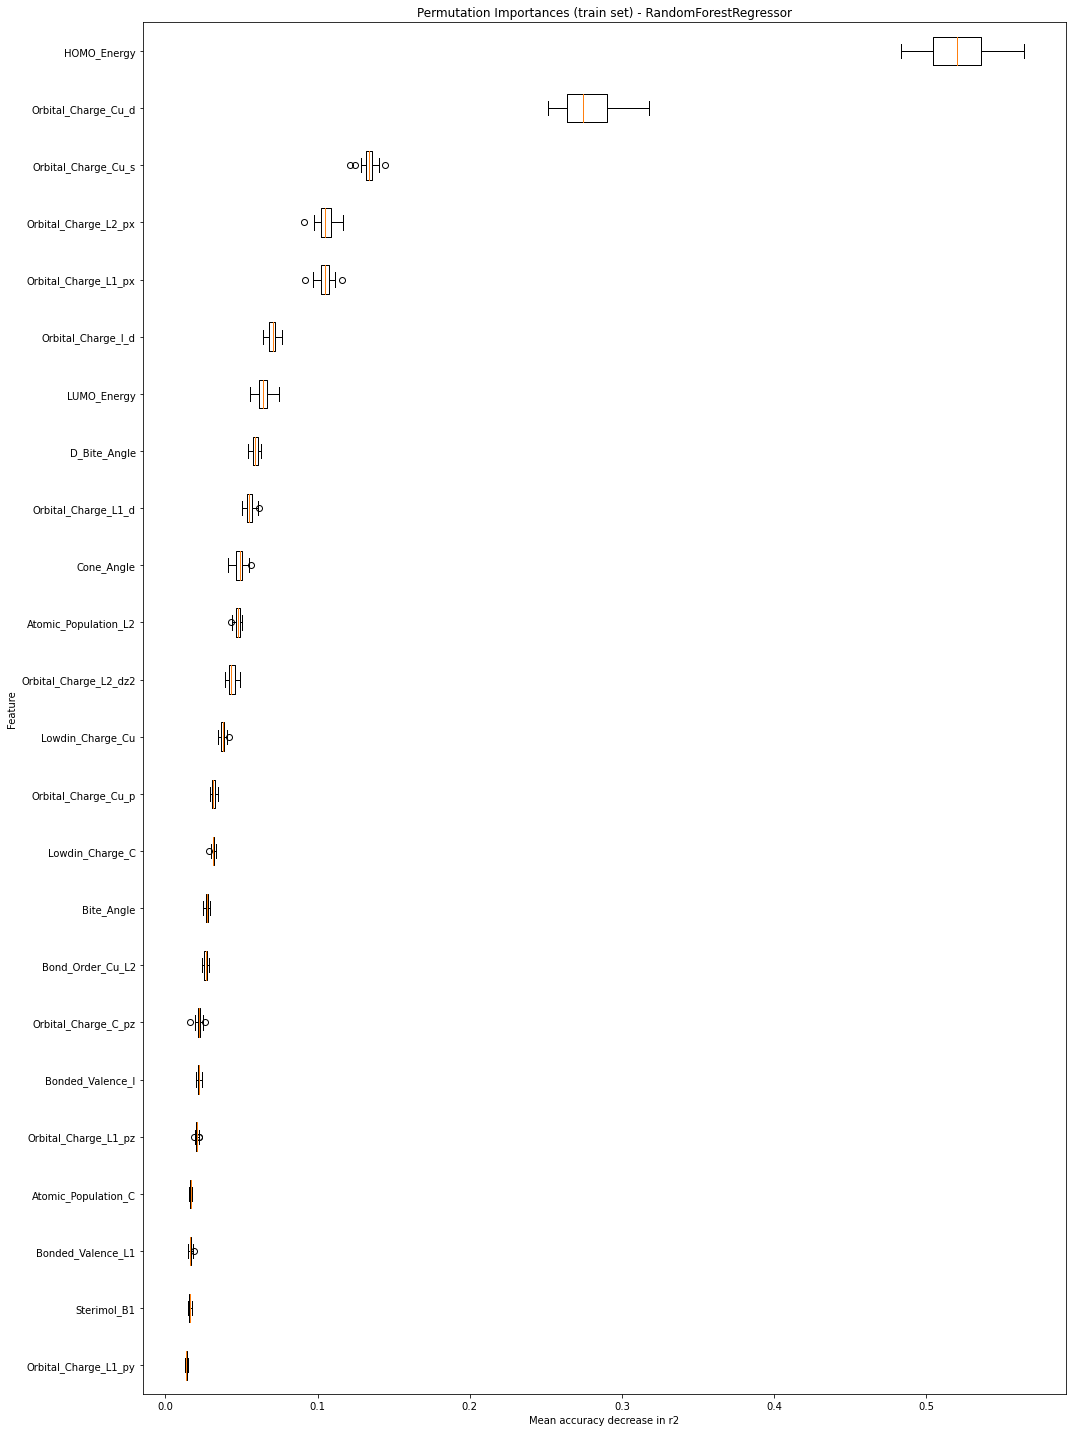

Using the neg_mean_absolute_percentage_error metric
HOMO_Energy: 48345533578097.227 +/- 16067617719046.131
Orbital_Charge_Cu_d: 39886740307105.602 +/- 10337080178595.572
Orbital_Charge_Cu_s: 10061441004914.498 +/- 4481663311384.108
Bond_Order_Cu_L2: 9950120218385.623 +/- 4800423172648.281
Orbital_Charge_I_d: 7053038070497.785 +/- 2729252752283.996
Atomic_Population_C: 3131251521046.009 +/- 1440109034753.047
LUMO_Energy: 1575046766178.317 +/- 616344045706.925
Orbital_Charge_L1_d: 1518029096606.914 +/- 451157136563.888
Sterimol_B1: 911371829931.305 +/- 373536250822.021


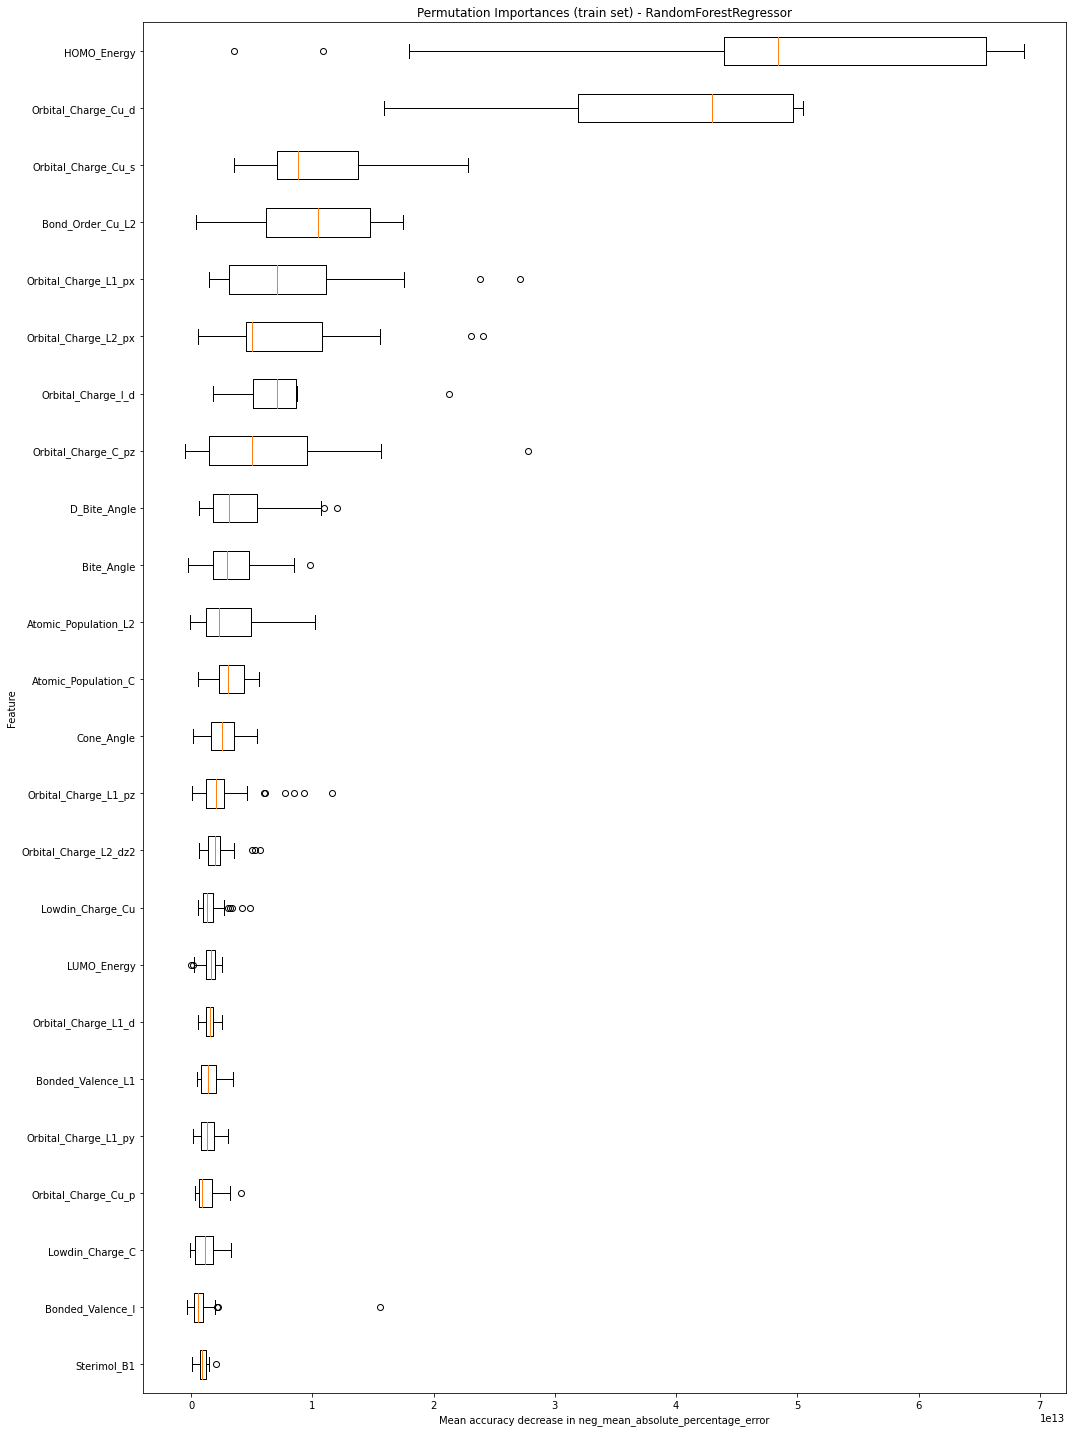

Using the neg_mean_squared_error metric
HOMO_Energy: 64.338 +/- 2.368
Orbital_Charge_Cu_d: 34.270 +/- 2.165
Orbital_Charge_Cu_s: 16.561 +/- 0.469
Orbital_Charge_L2_px: 13.027 +/- 0.609
Orbital_Charge_L1_px: 12.977 +/- 0.535
Orbital_Charge_I_d: 8.696 +/- 0.339
LUMO_Energy: 7.935 +/- 0.508
D_Bite_Angle: 7.329 +/- 0.234
Orbital_Charge_L1_d: 6.848 +/- 0.284
Cone_Angle: 6.010 +/- 0.361
Atomic_Population_L2: 5.879 +/- 0.221
Orbital_Charge_L2_dz2: 5.400 +/- 0.303
Lowdin_Charge_Cu: 4.661 +/- 0.184
Orbital_Charge_Cu_p: 3.916 +/- 0.165
Lowdin_Charge_C: 3.901 +/- 0.118
Bite_Angle: 3.340 +/- 0.124
Bond_Order_Cu_L2: 3.270 +/- 0.134
Orbital_Charge_C_pz: 2.715 +/- 0.170
Bonded_Valence_I: 2.701 +/- 0.106
Orbital_Charge_L1_pz: 2.552 +/- 0.098
Atomic_Population_C: 2.049 +/- 0.066
Bonded_Valence_L1: 2.040 +/- 0.088
Sterimol_B1: 1.973 +/- 0.084
Orbital_Charge_L1_py: 1.699 +/- 0.064


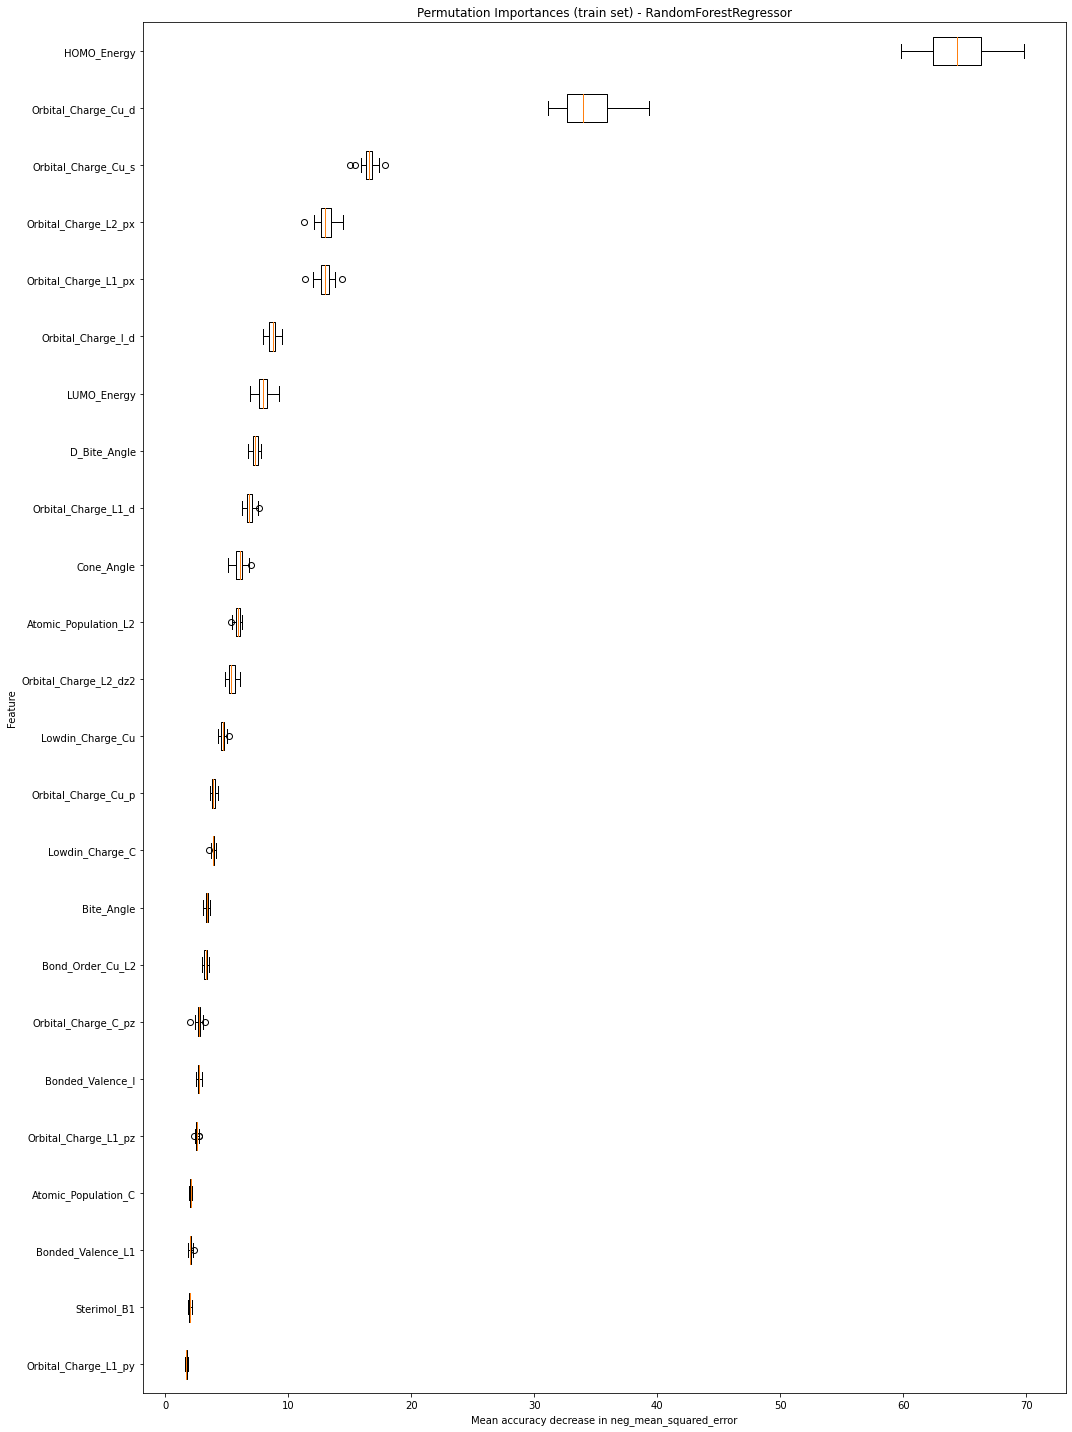

ExtraTreesRegressor(max_depth=37, n_estimators=297, n_jobs=8, random_state=42)
Elapsed time to compute the importances: 62.788 seconds
Using the r2 metric
HOMO_Energy: 0.732 +/- 0.026
Orbital_Charge_I_d: 0.190 +/- 0.008
Orbital_Charge_Cu_s: 0.123 +/- 0.003
Atomic_Population_L2: 0.093 +/- 0.003
Orbital_Charge_Cu_d: 0.091 +/- 0.003
Orbital_Charge_L1_d: 0.066 +/- 0.003
Orbital_Charge_L2_dz2: 0.062 +/- 0.004
Lowdin_Charge_C: 0.054 +/- 0.002
Bonded_Valence_L1: 0.046 +/- 0.002
LUMO_Energy: 0.045 +/- 0.002
D_Bite_Angle: 0.030 +/- 0.001
Lowdin_Charge_Cu: 0.023 +/- 0.001
Cone_Angle: 0.022 +/- 0.001
Bond_Order_Cu_L2: 0.021 +/- 0.001
Orbital_Charge_L2_px: 0.021 +/- 0.001
Orbital_Charge_Cu_p: 0.020 +/- 0.001
Bonded_Valence_I: 0.016 +/- 0.000
Bite_Angle: 0.013 +/- 0.000
Orbital_Charge_L1_px: 0.013 +/- 0.001
Orbital_Charge_C_pz: 0.011 +/- 0.001
Orbital_Charge_L1_py: 0.011 +/- 0.000
Sterimol_B1: 0.010 +/- 0.000
Atomic_Population_C: 0.009 +/- 0.000
Orbital_Charge_L1_pz: 0.007 +/- 0.000


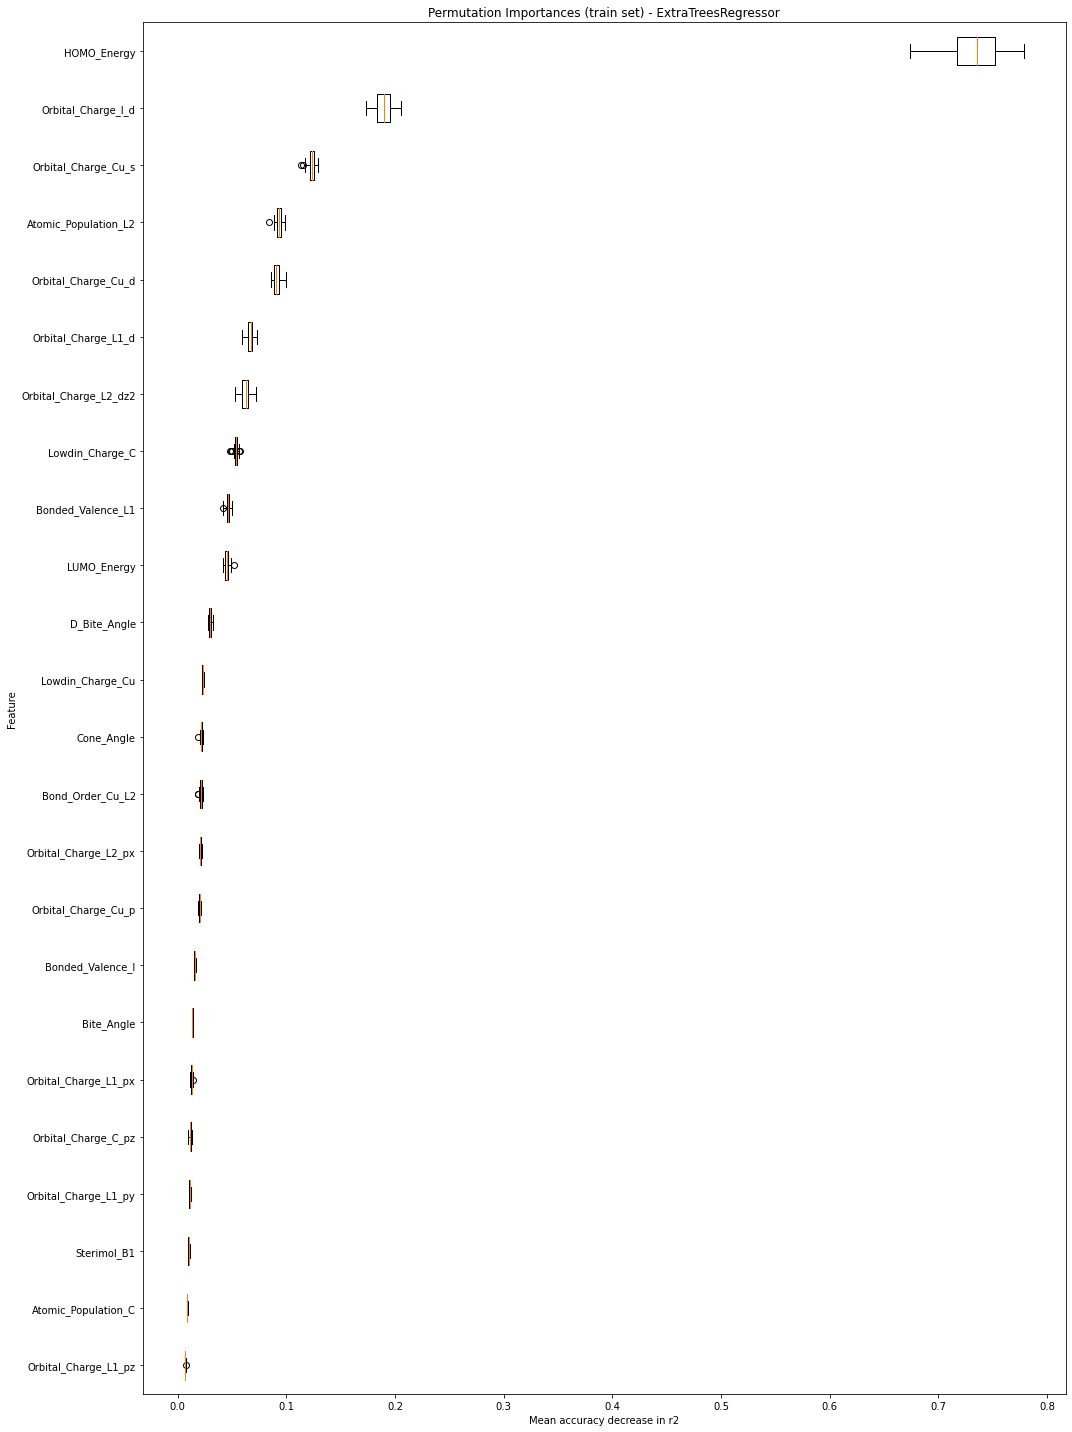

Using the neg_mean_absolute_percentage_error metric
HOMO_Energy: 77728850114254.812 +/- 28832059914282.457
Orbital_Charge_Cu_d: 33796302802868.148 +/- 9448807669765.467
Orbital_Charge_I_d: 25305929992736.977 +/- 6886805481422.243
Orbital_Charge_Cu_s: 18546124709907.676 +/- 7032538901366.327
LUMO_Energy: 16259516390147.176 +/- 5431789250157.656
Bond_Order_Cu_L2: 13098657122890.734 +/- 5195905999441.928
Lowdin_Charge_C: 10051558103863.639 +/- 3027546903405.660
Orbital_Charge_L1_d: 7876222027566.139 +/- 3248883962833.232
Lowdin_Charge_Cu: 7366746506129.097 +/- 1949800139109.931
Orbital_Charge_L2_px: 7188750498482.371 +/- 3156649344104.144
D_Bite_Angle: 6912902394293.316 +/- 2687270843540.755
Cone_Angle: 6314292217256.059 +/- 3107328124742.192
Atomic_Population_C: 5033817946119.499 +/- 2088899870331.573
Orbital_Charge_L2_dz2: 4747989550084.363 +/- 1892954102781.140
Orbital_Charge_L1_pz: 3962807288365.465 +/- 1259429658809.813
Orbital_Charge_Cu_p: 3204729199781.168 +/- 1338069643620.875
Ste

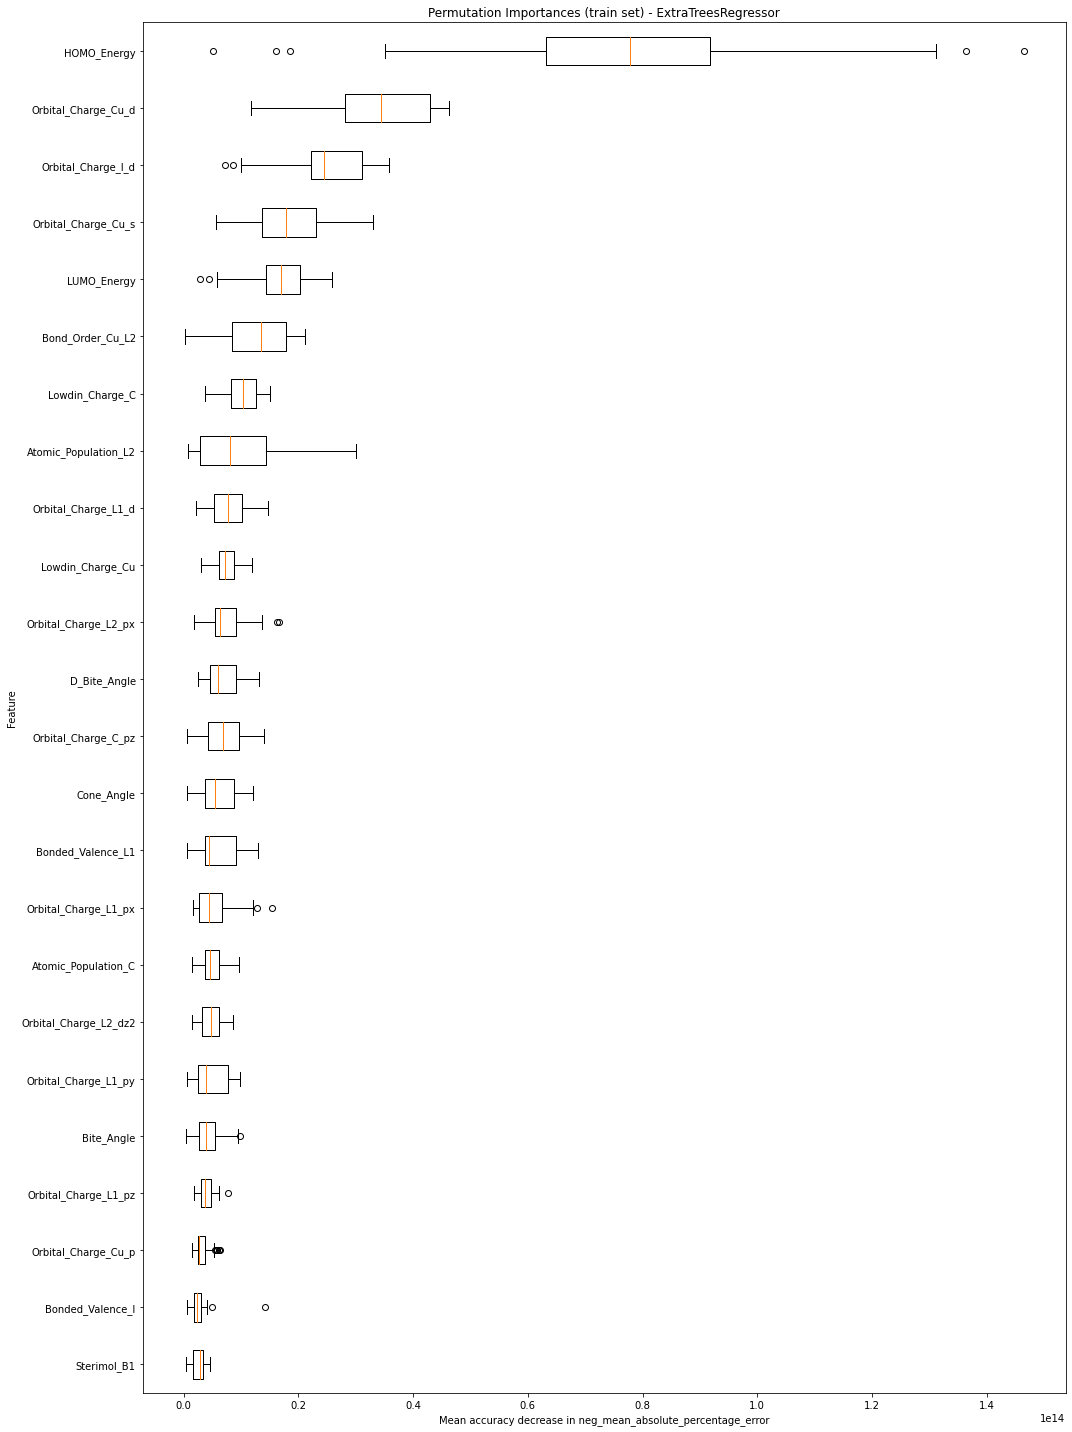

Using the neg_mean_squared_error metric
HOMO_Energy: 90.544 +/- 3.229
Orbital_Charge_I_d: 23.469 +/- 1.028
Orbital_Charge_Cu_s: 15.266 +/- 0.395
Atomic_Population_L2: 11.531 +/- 0.331
Orbital_Charge_Cu_d: 11.242 +/- 0.399
Orbital_Charge_L1_d: 8.219 +/- 0.378
Orbital_Charge_L2_dz2: 7.708 +/- 0.532
Lowdin_Charge_C: 6.631 +/- 0.203
Bonded_Valence_L1: 5.728 +/- 0.237
LUMO_Energy: 5.583 +/- 0.254
D_Bite_Angle: 3.718 +/- 0.132
Lowdin_Charge_Cu: 2.858 +/- 0.074
Cone_Angle: 2.664 +/- 0.097
Bond_Order_Cu_L2: 2.629 +/- 0.130
Orbital_Charge_L2_px: 2.561 +/- 0.084
Orbital_Charge_Cu_p: 2.522 +/- 0.090
Bonded_Valence_I: 1.939 +/- 0.059
Bite_Angle: 1.657 +/- 0.043
Orbital_Charge_L1_px: 1.606 +/- 0.066
Orbital_Charge_C_pz: 1.419 +/- 0.102
Orbital_Charge_L1_py: 1.380 +/- 0.058
Sterimol_B1: 1.231 +/- 0.059
Atomic_Population_C: 1.078 +/- 0.034
Orbital_Charge_L1_pz: 0.841 +/- 0.027


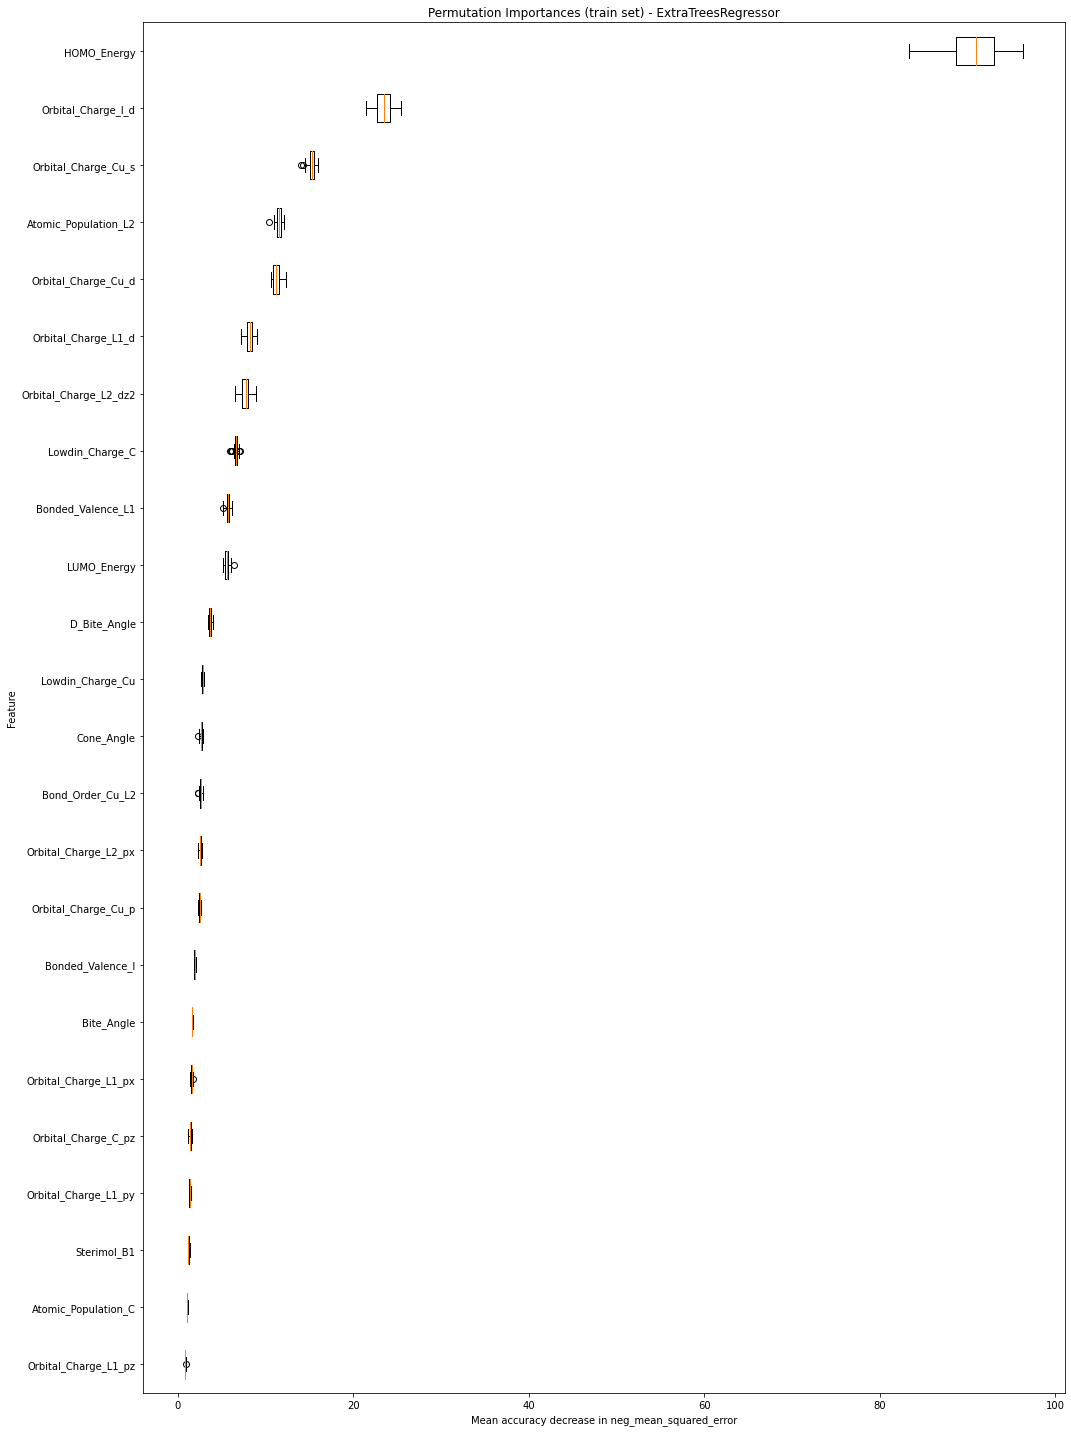

In [5]:
for model in tqdm(models):
    start_time = time.time()
    print(str(model))
    model_name = type(model).__name__
    r_multi = permutation_importance(model, X_train, y_train, n_repeats=50, random_state=RANDOM_SEED, scoring=scoring)
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    for metric in r_multi:
        print(f"Using the {metric} metric")
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
               print(f"{Descs[i]}: "
                     f"{r.importances_mean[i]:.3f}"
                     f" +/- {r.importances_std[i]:.3f}")
        
        perm_sorted_idx = r.importances_mean.argsort()

        importance_sorted_idx = np.argsort(model.feature_importances_)
        fig, ax2 = plt.subplots(figsize=(15, 20))
        ax2.boxplot(
            r.importances[perm_sorted_idx].T,
            vert=False,
            labels=Descs[perm_sorted_idx],
            
        )
        ax2.set_title(f"Permutation Importances (train set) - {model_name}")
        ax2.set_ylabel("Feature")
        ax2.set_xlabel(f"Mean accuracy decrease in {metric}")
        fig.tight_layout()
        plt.show()

## Checking for Colinearity

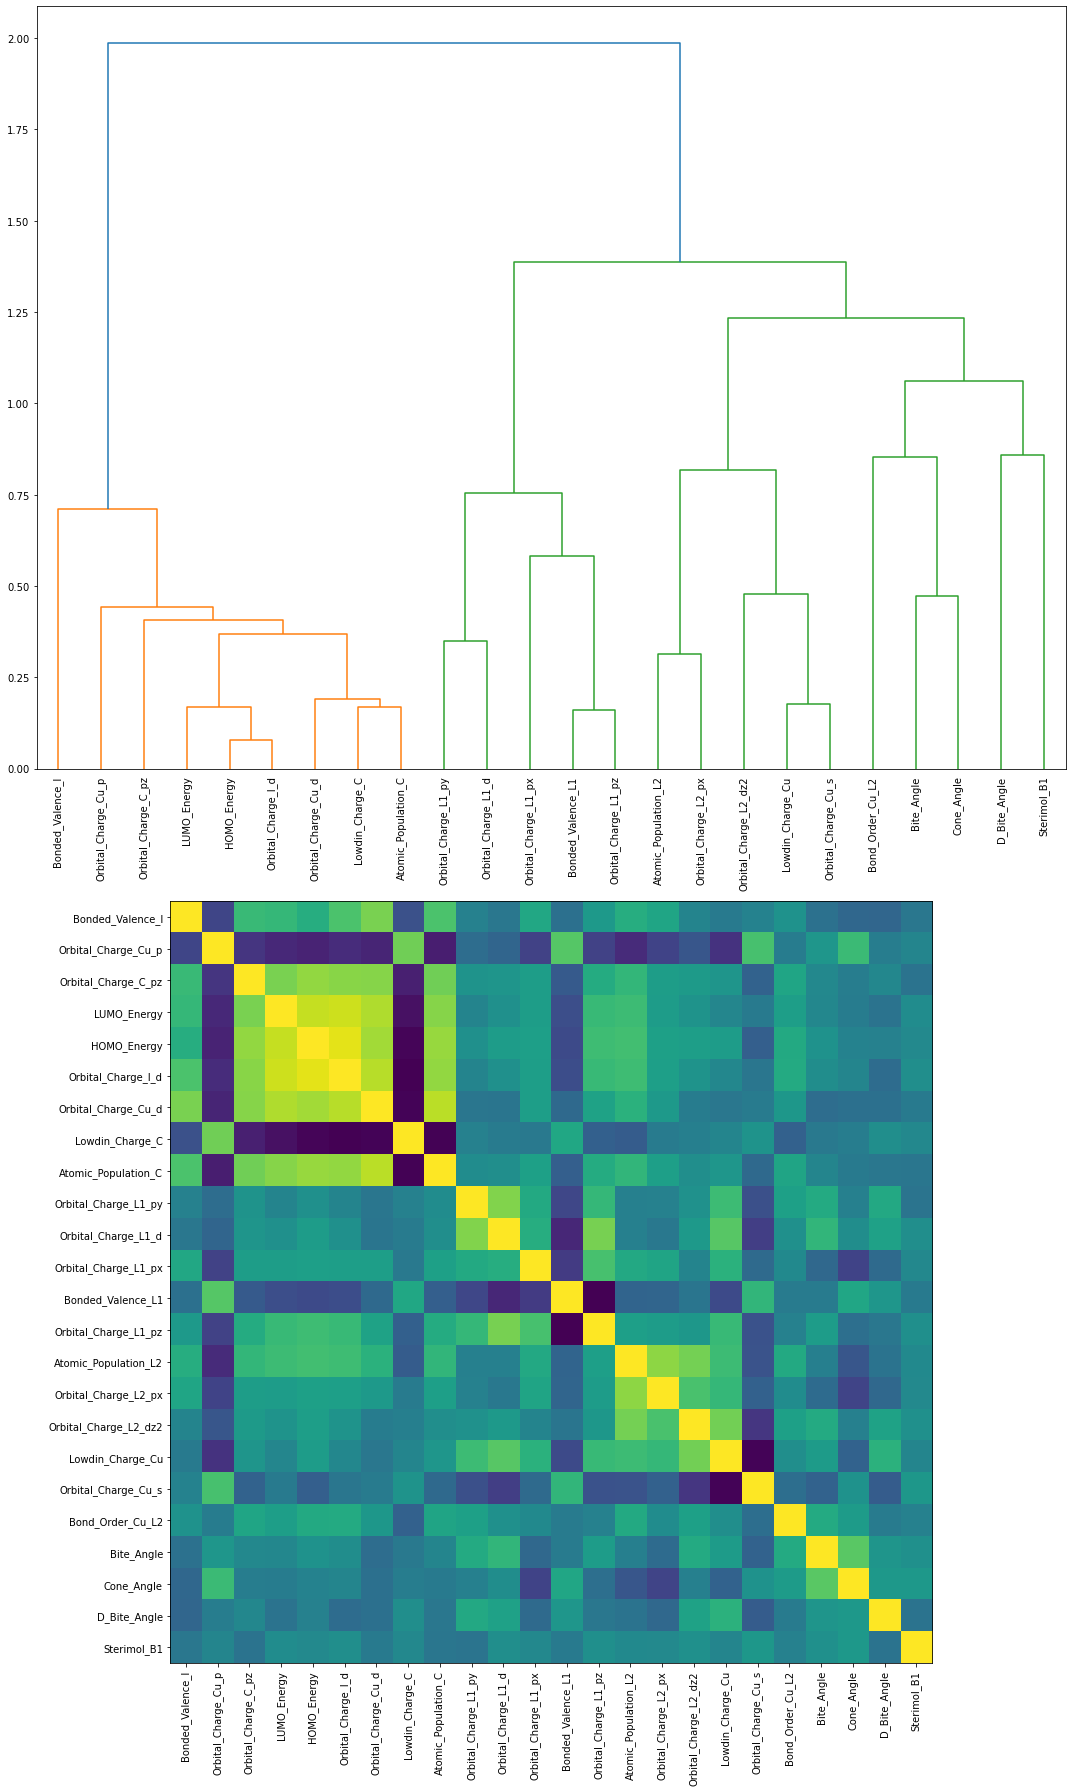

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 25))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=train_set.columns[1:-1].tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

## Test with features removed

In [7]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0.6, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

rf_obj2 = ensemble.RandomForestRegressor(n_estimators=449, max_depth=96, random_state=RANDOM_SEED, n_jobs=8).fit(X_train_sel, y_train)
et_obj2 = ensemble.ExtraTreesRegressor(n_estimators=770, max_depth=28, random_state=RANDOM_SEED, n_jobs=8).fit(X_train_sel, y_train)

models2 = [rf_obj2, et_obj2]

for model in models2:

    print(
        f"Accuracy on test data with features removed {type(model).__name__}: {model.score(X_test_sel, y_test):.2f}"           
    )

Accuracy on test data with features removed RandomForestRegressor: 0.66
Accuracy on test data with features removed ExtraTreesRegressor: 0.67
